Epoch 1/50


d:\Python\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1349
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0103
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0094
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0093
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0092
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0090
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0089
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0087
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0086
Epoch 10/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0085
Epoch 11/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0083
Epoch 12/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0081
Epoch 13/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0080
Epoch 14/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0078
Epoch 15/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0076
Epoch 16/50
43/43 ━━━━━━━━━━━━

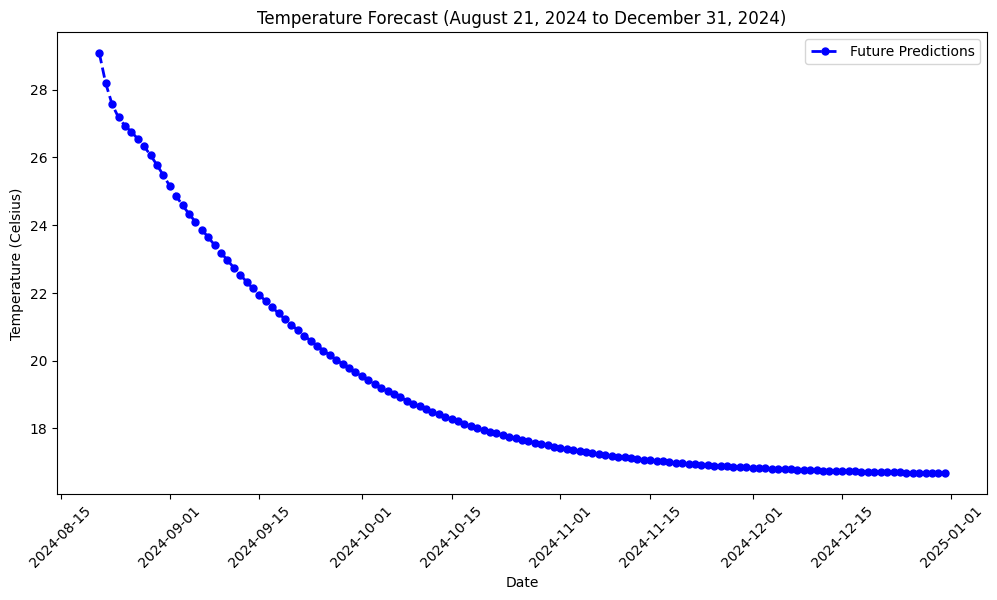

In [8]:
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting graphs
from sklearn.preprocessing import MinMaxScaler  # For scaling data
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # For evaluating the model
from tensorflow.keras.models import Sequential  # For creating the model
from tensorflow.keras.layers import LSTM, Dense  # For adding layers to the model


# STEP 1. LOAD AND PREPARE THE DATA
#region
# 1.1 Load the dataset
file_path = '../dataset/Data.csv'  # Path to the CSV file
data = pd.read_csv(file_path)

# 1.2 Convert 'datetime' column to datetime objects and set as index
data['ds'] = pd.to_datetime(data['datetime'], format='%m/%d/%Y')
data.set_index('ds', inplace=True)

# 1.3 Use temperature ('temp') as the target variable
temperature = data['temp'].values.reshape(-1, 1)  # Reshape 'temp' for scaling
#endregion

# STEP 2. SCALE THE DATA
#region
# 2.1 Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))  # Initialize the scaler

# 2.2 Fit and transform the temperature data
scaled_data = scaler.fit_transform(temperature)  # Scale the temperature data
#endregion

# STEP 3. CREATE A DATASET WITH TIME STEPS
#region
# 3.1 Define the function to create datasets with time steps
def create_dataset(data, time_step=1):
    X, y = [], []  # Initialize lists to hold features and targets
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])  # Append the feature values
        y.append(data[i + time_step, 0])  # Append the target value
    return np.array(X), np.array(y)  # Convert lists to numpy arrays

# 3.2 Create features and targets using the defined function
time_step = 10  # Define the time step for creating the dataset
X, y = create_dataset(scaled_data, time_step)  # Create the dataset

# 3.3 Reshape X to be [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)  # Add an additional dimension for features
#endregion

# STEP 4. SPLIT THE DATA INTO TRAINING AND TESTING SETS
#region
# 4.1 Define the split index
split_index = int(len(X) * 0.8)  # Define the split index

# 4.2 Split the features and targets into training and testing sets
X_train, X_test = X[:split_index], X[split_index:]  # Split the features
y_train, y_test = y[:split_index], y[split_index:]  # Split the targets
#endregion

# STEP 5. BUILD AND COMPILE THE LSTM MODEL
#region
# 5.1 Initialize the Sequential model
model = Sequential()  # Initialize the model

# 5.2 Add LSTM layers and Dense output layer
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))  # Add first LSTM layer
model.add(LSTM(units=50, return_sequences=False))  # Add second LSTM layer
model.add(Dense(1))  # Add output layer

# 5.3 Compile the model with 'adam' optimizer and 'mean_squared_error' loss function
model.compile(optimizer='adam', loss='mean_squared_error')  # Compile the model
#endregion

# STEP 6. TRAIN THE MODEL WITH INCREASED EPOCHS AND EARLY STOPPING
#region
# 6.1 Implement EarlyStopping to avoid overfitting
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)  # Stop if loss doesn't improve for 10 epochs

# 6.2 Fit the model with increased epochs
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, callbacks=[early_stopping])  # Increase epochs to 50 and apply early stopping
#endregion

# STEP 7. MAKE PREDICTIONS AND EVALUATE THE MODEL
#region
# 7.1 Predict the test set
predictions = model.predict(X_test)  # Predict the test set

# 7.2 Inverse transform the predictions and actual values
predictions = scaler.inverse_transform(predictions)  # Inverse transform the predictions
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))  # Inverse transform the actual values

# 7.3 Calculate performance metrics
rmse = np.sqrt(mean_squared_error(y_test_inv, predictions))  # Calculate RMSE
mae = mean_absolute_error(y_test_inv, predictions)  # Calculate MAE
r2 = r2_score(y_test_inv, predictions)  # Calculate R² Score

print(f"RMSE: {rmse:.3f}")  # Print RMSE
print(f"MAE: {mae:.3f}")  # Print MAE
print(f"R^2 Score: {r2:.3f}")  # Print R^2 Score
#endregion

# STEP 8. GENERATE FUTURE PREDICTIONS
#region
# 8.1 Define future dates
future_dates = pd.date_range(start='2024-08-21', end='2024-12-31', freq='D')  # Define the future dates
future_steps = len(future_dates)  # Number of future steps

# 8.2 Prepare the last sequence for predictions
last_sequence = scaled_data[-time_step:]  # Get the last sequence of data
future_predictions = []  # List to hold future predictions

# 8.3 Predict future values and update the sequence for each step
for _ in range(future_steps):
    last_sequence = last_sequence.reshape((1, time_step, 1))  # Reshape for the model
    future_pred = model.predict(last_sequence)  # Predict the next value
    future_predictions.append(future_pred[0, 0])  # Append the prediction
    future_pred_reshaped = future_pred.reshape(1, 1, 1)  # Reshape the prediction
    last_sequence = np.concatenate((last_sequence[:, 1:, :], future_pred_reshaped), axis=1)  # Update the sequence
#endregion

# STEP 9. SAVE AND PLOT THE RESULTS
#region
# 9.1 Inverse transform the future predictions
future_predictions_inv = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))  # Inverse transform the future predictions

# 9.2 Create DataFrame for future results
future_results_df = pd.DataFrame({
    'Date': future_dates,  # Dates
    'Predicted Temperature': future_predictions_inv.flatten()  # Predictions
})

# 9.3 Save the predictions to a CSV file
future_results_df.to_csv('future_weather_predictions_lstm_2024.csv', index=False)  # Save to CSV
print("Future weather predictions saved to 'future_weather_predictions_lstm_2024.csv'")  # Confirmation message

# 9.4 Plot the future predicted temperatures
plt.figure(figsize=(12, 6))  # Set figure size

# Plot future predictions
plt.plot(future_dates, future_predictions_inv, color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=5, label='Future Predictions')  # Future predictions in blue

plt.xlabel('Date')  # X-axis label
plt.ylabel('Temperature (Celsius)')  # Y-axis label
plt.title('Temperature Forecast (August 21, 2024 to December 31, 2024)')  # Plot title
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.legend()  # Show legend
plt.show()  # Display the plot
#endregion
